In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
vg_df = pd.read_csv('C:/Users/Dell/Downloads/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [12]:
vg_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
vg_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [14]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [15]:
# Fill missing numerical values with median
vg_df.fillna(vg_df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
vg_df.fillna(vg_df.mode().iloc[0], inplace=True)

print("Missing values handled successfully!")

Missing values handled successfully!


In [16]:
# Remove duplicate rows if any
vg_df.drop_duplicates(inplace=True)

# Confirm duplicate removal
print("Duplicates removed. Total rows left:", vg_df.shape[0])

Duplicates removed. Total rows left: 16719


In [18]:
# Detect and treat outliers using IQR (only for numerical columns)
numeric_cols = vg_df.select_dtypes(include=['number']).columns  # Select only numerical columns
Q1 = vg_df[numeric_cols].quantile(0.25)
Q3 = vg_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers only in numerical columns
vg_df = vg_df[~((vg_df[numeric_cols] < lower_bound) | (vg_df[numeric_cols] > upper_bound)).any(axis=1)]

print("Outliers handled. Total rows left:", vg_df.shape[0])

Outliers handled. Total rows left: 5749


In [20]:
#summary statistics
print(vg_df.describe(include='all'))  # Includes numerical & categorical data

                                   Name Platform  Year_of_Release   Genre  \
count                              5749     5749      5749.000000    5749   
unique                             4954       30              NaN      12   
top     The Amazing Spider-Man 2 (2014)       DS              NaN  Action   
freq                                  6     1185              NaN     992   
mean                                NaN      NaN      2007.207514     NaN   
std                                 NaN      NaN         5.470288     NaN   
min                                 NaN      NaN      1993.000000     NaN   
25%                                 NaN      NaN      2004.000000     NaN   
50%                                 NaN      NaN      2008.000000     NaN   
75%                                 NaN      NaN      2011.000000     NaN   
max                                 NaN      NaN      2020.000000     NaN   

                 Publisher     NA_Sales     EU_Sales     JP_Sales  \
count 

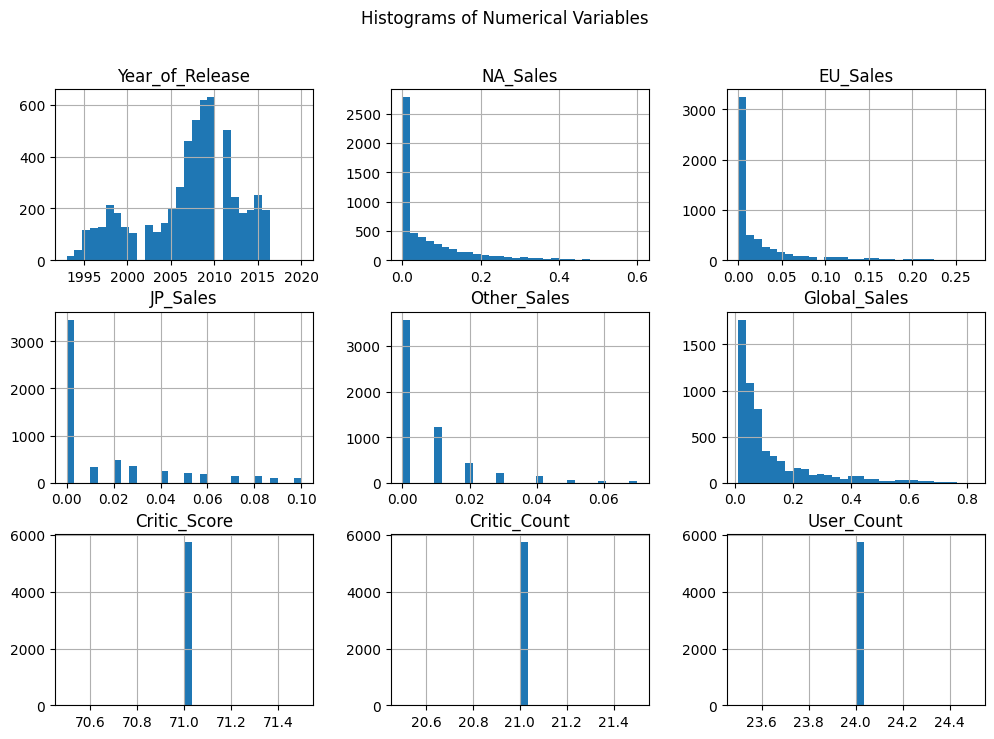

In [21]:
# Histograms
vg_df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

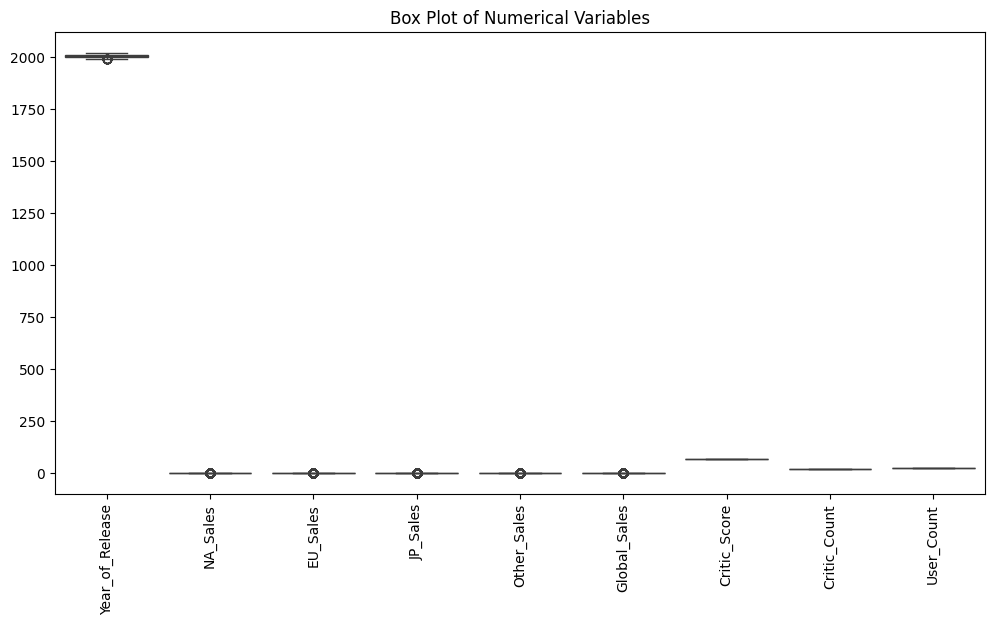

In [22]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=vg_df)
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Variables")
plt.show()

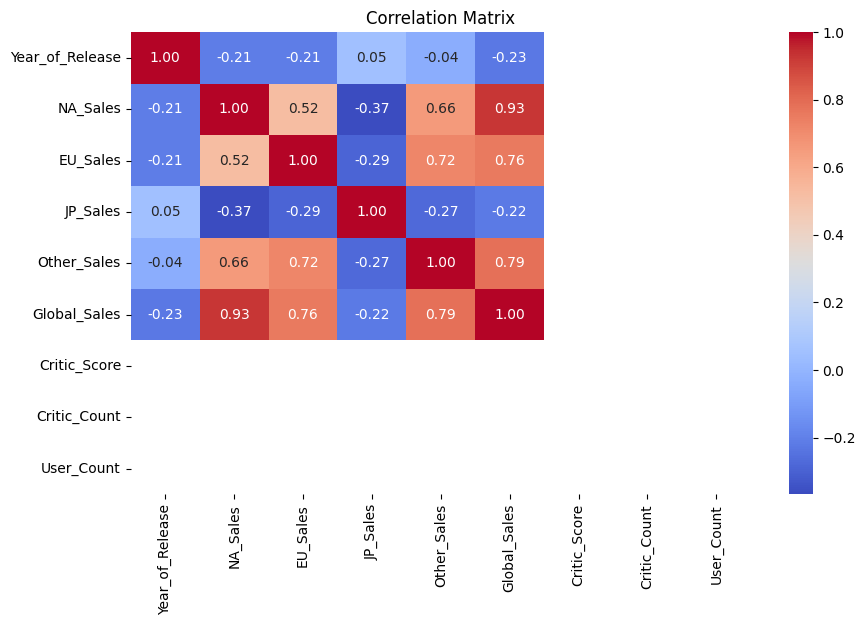

In [23]:
#bivariate analysis
#correlation matrix
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(vg_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

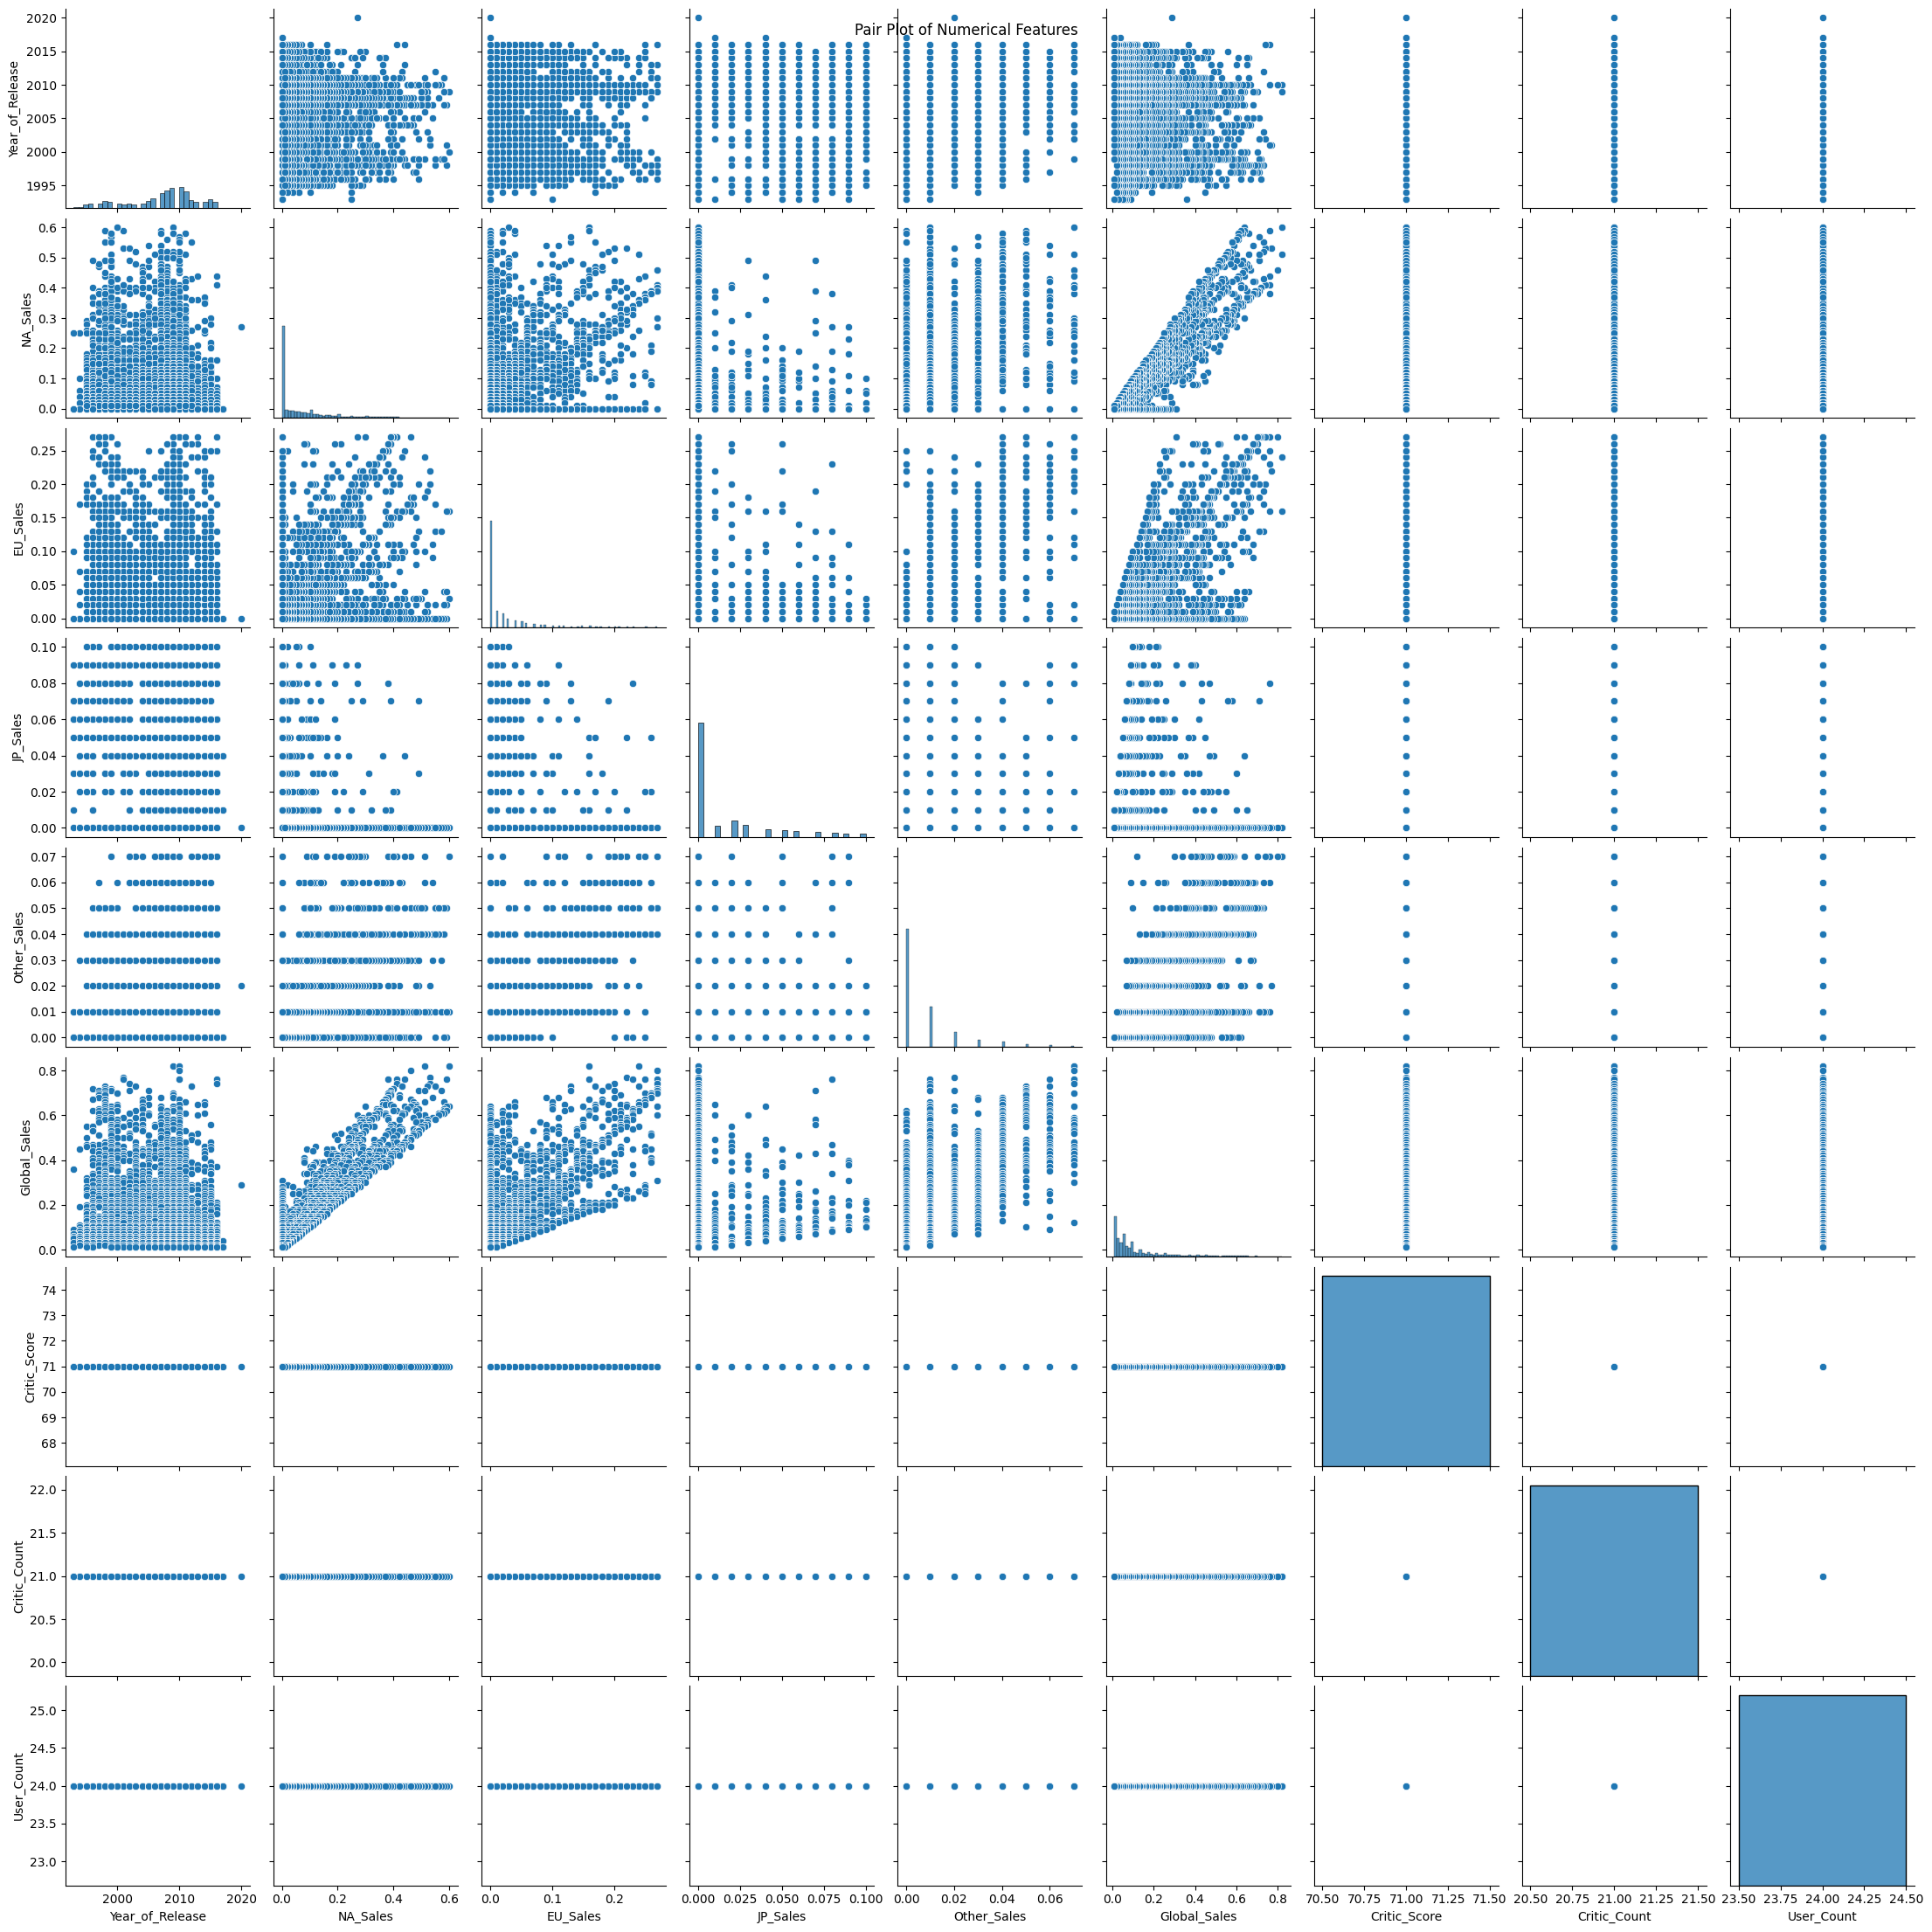

In [24]:
# Scatter plot
sns.pairplot(vg_df.select_dtypes(include=['number']))
plt.suptitle("Pair Plot of Numerical Features")
plt.show()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

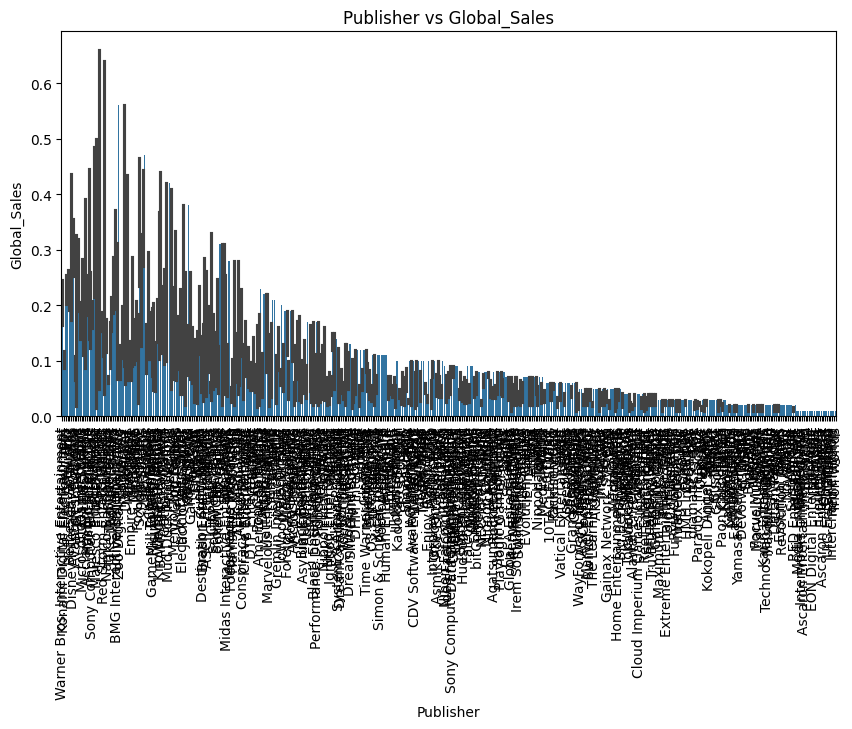

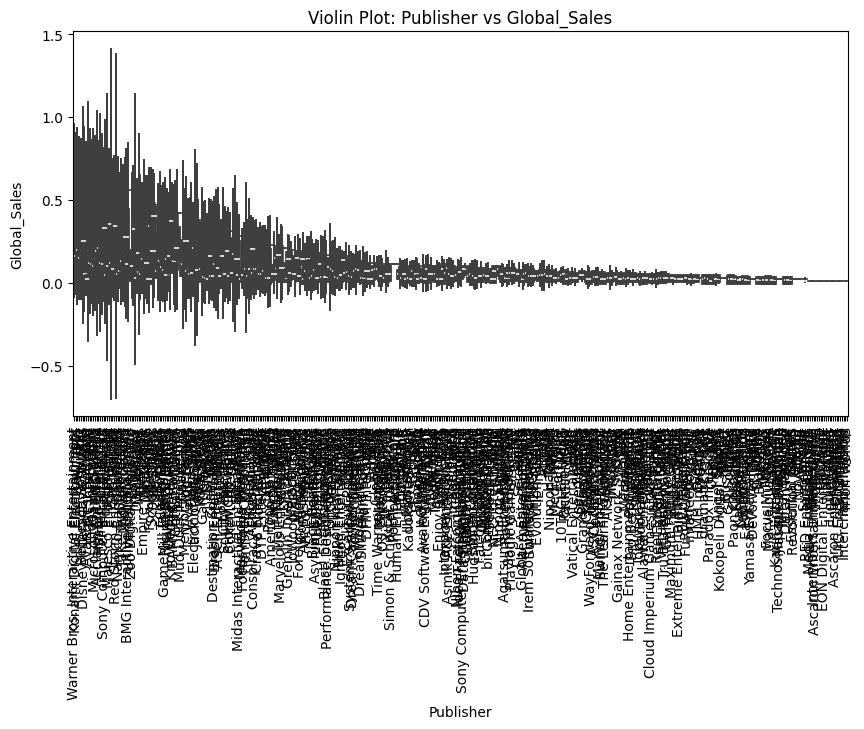

In [30]:
#Bar Plots, Violin Plots & Box Plots
plt.figure(figsize=(10, 5))
sns.barplot(x='Publisher', y='Global_Sales', data=vg_df)
plt.xticks(rotation=90)
plt.title("Publisher vs Global_Sales")
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(x='Publisher', y='Global_Sales', data=vg_df)
plt.xticks(rotation=90)
plt.title("Violin Plot: Publisher vs Global_Sales")
plt.show()

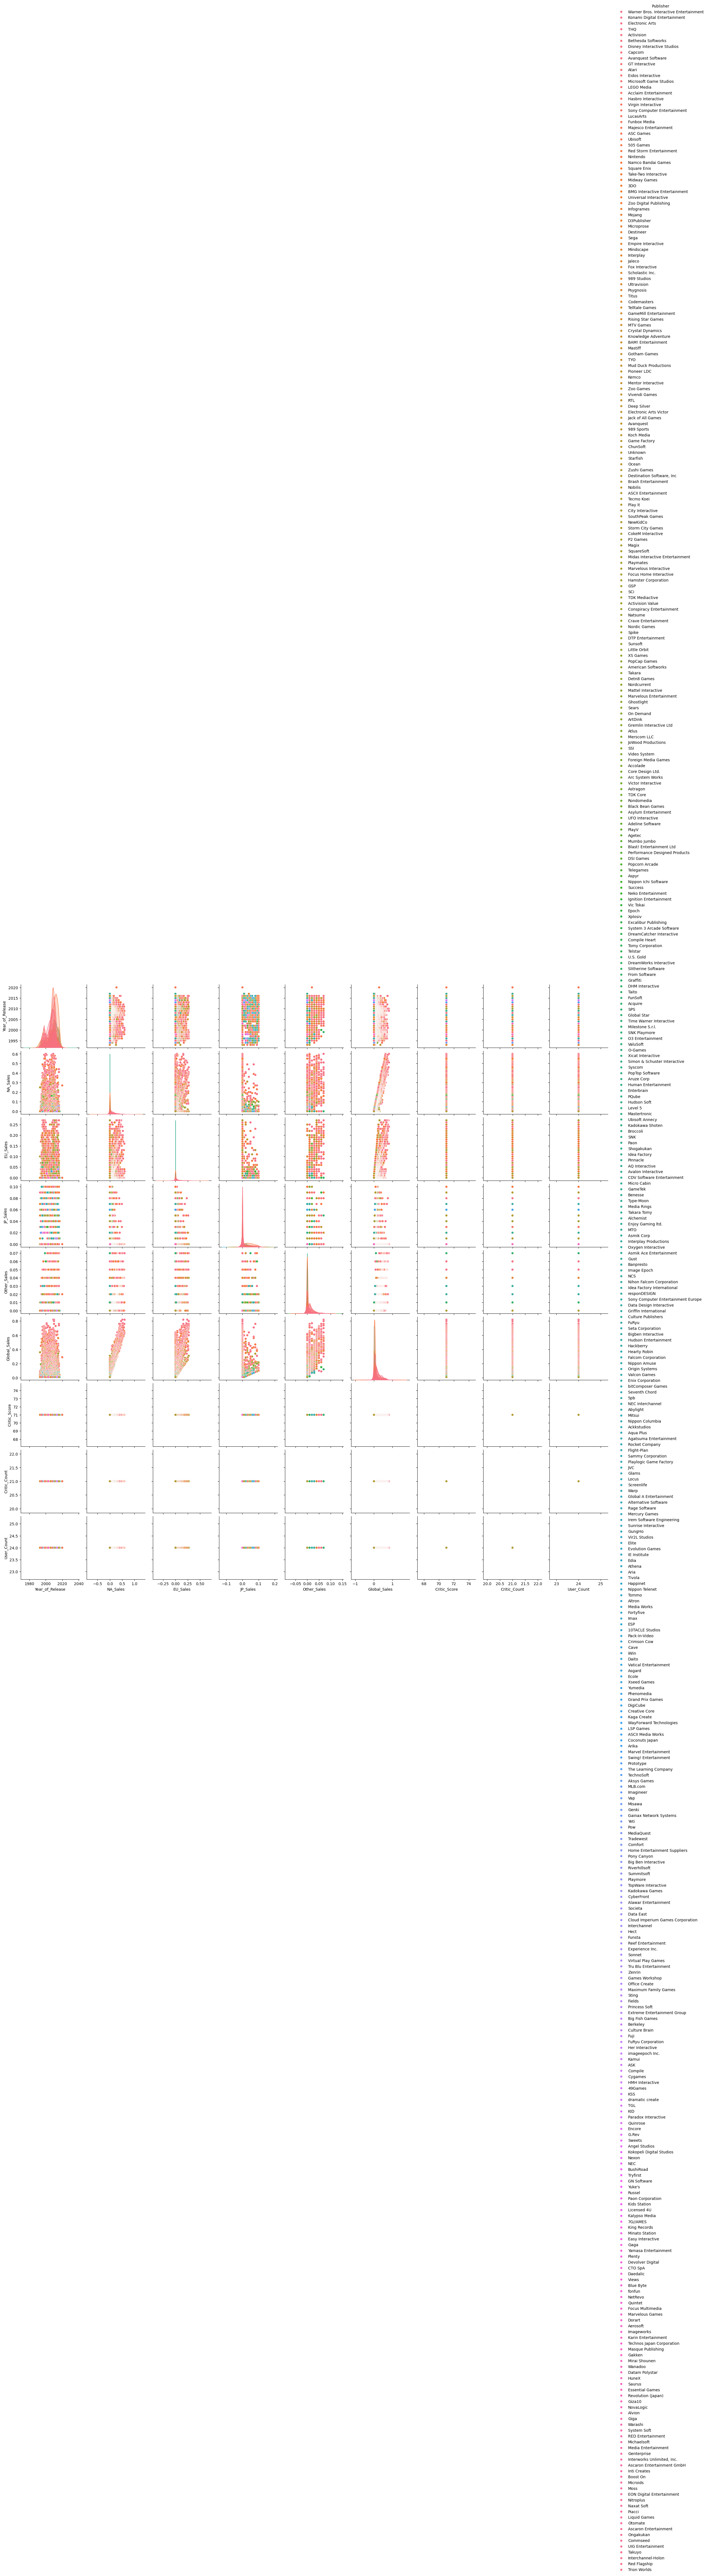

In [31]:
#multivariate analysis
#Pair Plots
sns.pairplot(vg_df, hue='Publisher')
plt.show()

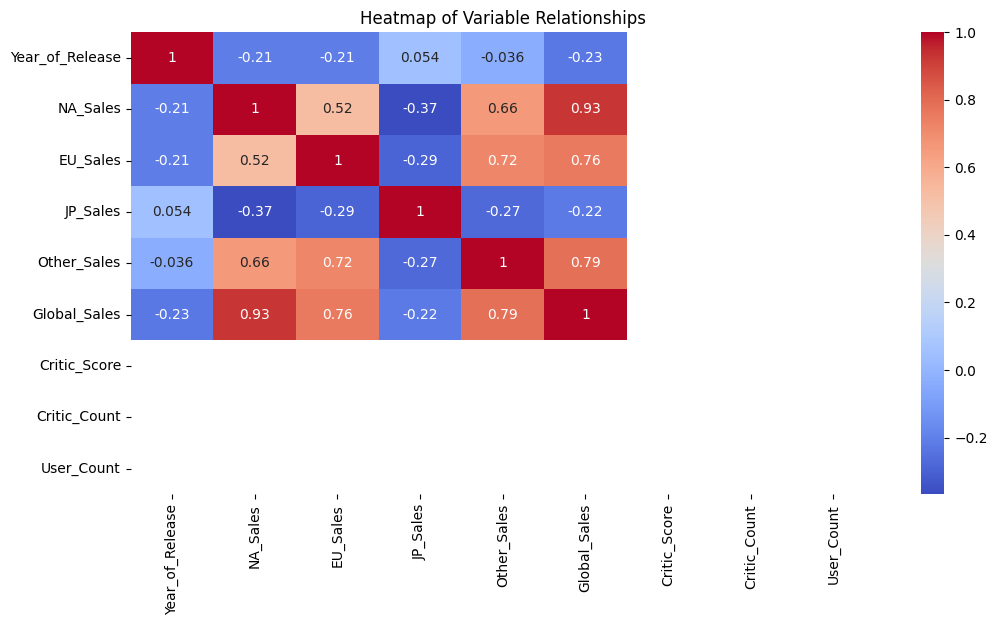

In [32]:
#heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(vg_df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Heatmap of Variable Relationships")
plt.show()

In [36]:
vg_df.to_csv("C:/Users/Dell/Downloads/Video_Games_Sales_as_at_22_Dec_2016.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
